## Logistic Regression for Binary Classification

---

## 📘 Logistic Regression – Key Points

### 1. **Purpose**

* Logistic Regression is used for **classification problems** (binary or multi-class).
* It predicts the **probability** of an instance belonging to a class.

---

### 2. **Prediction Equation**

Similar to linear regression but mapped to a probability:

$$
z = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n
$$

---

### 3. **Logit Model**

* Instead of predicting values directly, we model the **log-odds** of the probability:

$$
\text{logit}(p) = \ln \left( \frac{p}{1-p} \right) = z
$$

where

* $p$ = probability of positive class
* $z$ = linear combination of features

---

### 4. **Sigmoid (Logistic) Function**

* Maps any real number $z$ into a probability range $[0,1]$:

$$
p = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

* If $p \geq 0.5$ → predict **1** (positive class), else predict **0** (negative class).

---

### 5. **Decision Boundary**

* The threshold (usually 0.5) determines class labels.
* Different thresholds can be chosen based on **precision-recall tradeoff**.

---

### 6. **Loss Function (Binary Cross-Entropy / Log Loss)**

* Measures how well the predicted probabilities match actual labels:

$$
J(\beta) = - \frac{1}{m} \sum_{i=1}^{m} \Big[ y^{(i)} \log(p^{(i)}) + (1-y^{(i)}) \log(1 - p^{(i)}) \Big]
$$

where

* $y^{(i)}$ = actual class (0 or 1)
* $p^{(i)}$ = predicted probability
* $m$ = number of samples

---

### 7. **Optimization**

* The loss function is minimized using **Gradient Descent** (or advanced optimizers).
* Coefficients $\beta$ are adjusted iteratively.

---


⚡ **Summary**

* Logistic regression predicts probabilities using the **sigmoid function**.
* The model is based on the **logit (log-odds) transformation**.
* It uses **cross-entropy loss** and **gradient descent** for training.
* Output is a probability → converted into class labels using a **threshold**.

---


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [7]:
df = pd.read_csv("dia_clean.csv")
df

,Unnamed: 0,preg,plas,pres,skin,mass,pedi,age,class
0,0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
728,763,10,101.0,76.0,48.0,32.9,0.171,63,0
729,764,2,122.0,70.0,27.0,36.8,0.340,27,0
730,765,5,121.0,72.0,23.0,26.2,0.245,30,0
731,766,1,126.0,60.0,29.0,30.1,0.349,47,1


In [5]:

# Drop unwanted unnamed column(s)
df = df.loc[:, ~df.columns.str.contains("^Unnamed")]
df

,preg,plas,pres,skin,mass,pedi,age,class
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
728,10,101.0,76.0,48.0,32.9,0.171,63,0
729,2,122.0,70.0,27.0,36.8,0.340,27,0
730,5,121.0,72.0,23.0,26.2,0.245,30,0
731,1,126.0,60.0,29.0,30.1,0.349,47,1


In [23]:
# Idenfy class balance

df["class"].value_counts()

class
0    481
1    252
Name: count, dtype: int64

In [9]:
# Features and target
X = df.drop(columns=["class"])
y = df["class"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
y_train.value_counts()

class
0    385
1    201
Name: count, dtype: int64

In [13]:
# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [17]:
# Metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


Accuracy : 0.7551020408163265
Precision: 0.7027027027027027
Recall   : 0.5098039215686274
F1 Score : 0.5909090909090909


In [19]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[85 11]
 [25 26]]


In [21]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83        96
           1       0.70      0.51      0.59        51

    accuracy                           0.76       147
   macro avg       0.74      0.70      0.71       147
weighted avg       0.75      0.76      0.74       147



#### Apply SMOTE() to balance the classes

In [27]:
# Apply SMOTE on training data only

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_res, y_train_res)

LogisticRegression(max_iter=1000)

In [46]:
y_train_res.value_counts()

class
0    385
1    385
Name: count, dtype: int64

In [31]:
# Predictions
y_pred = model.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [33]:
# Metrics
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))


Accuracy : 0.7210884353741497
Precision: 0.5892857142857143
Recall   : 0.6470588235294118
F1 Score : 0.616822429906542


In [35]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[73 23]
 [18 33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.76      0.78        96
           1       0.59      0.65      0.62        51

    accuracy                           0.72       147
   macro avg       0.70      0.70      0.70       147
weighted avg       0.73      0.72      0.72       147



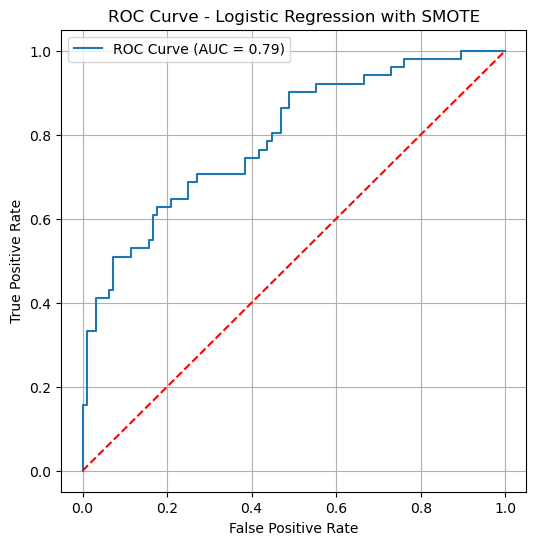

In [54]:
# Receiver Operating Characteristic Curve (ROC Curve)
import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(X_test)[:, 1]  # probability for ROC

from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
                     # Area Under the Curve (AUC)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], linestyle="--", color="red")  # random classifier
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression with SMOTE")
plt.legend()
plt.grid()
plt.show()

## Performance metrics in Classification


---

### 📌 Confusion Matrix (Binary Classification)

|                     | Predicted Positive  | Predicted Negative  |
| ------------------- | ------------------- | ------------------- |
| **Actual Positive** | True Positive (TP)  | False Negative (FN) |
| **Actual Negative** | False Positive (FP) | True Negative (TN)  |

---

### 1. **Accuracy**

👉 Proportion of total correct predictions.

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

---

### 2. **Precision (Positive Predictive Value)**

👉 Of all predicted positives, how many were actually positive.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

---

### 3. **Recall (Sensitivity or True Positive Rate)**

👉 Of all actual positives, how many did the model correctly identify.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

---

### 4. **F1 Score**

👉 Harmonic mean of precision and recall (balances both).

$$
\text{F1 Score} = \frac{2 \cdot (\text{Precision} \cdot \text{Recall})}{\text{Precision} + \text{Recall}}
$$

---

### 5. **Specificity (True Negative Rate)**

👉 Of all actual negatives, how many were correctly identified.

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

---

### 6. **False Positive Rate (FPR)**

👉 Of all actual negatives, how many were wrongly predicted as positive.

$$
\text{FPR} = \frac{FP}{FP + TN}
$$

---

### 7. **False Negative Rate (FNR)**

👉 Of all actual positives, how many were wrongly predicted as negative.

$$
\text{FNR} = \frac{FN}{TP + FN}
$$

---

### 8. **ROC-AUC (Area Under Curve)**

👉 Measures model’s ability to distinguish between classes.

* ROC curve plots **TPR (Recall)** vs **FPR**.
* **AUC = 1** → perfect classifier, **0.5** → random guessing.

---

### 9. **Precision-Recall AUC**

👉 Especially useful for **imbalanced datasets**.

* Plots **Precision vs Recall**.
* AUC closer to **1** means better performance.

---

⚡ Summary:

* **Accuracy**: overall correctness.
* **Precision**: how reliable positive predictions are.
* **Recall**: how well positives are captured.
* **F1 Score**: balance between precision & recall.
* **ROC-AUC**: discrimination ability.

---

